In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_final = pd.read_csv('data\COVID-19-final.csv', ';')

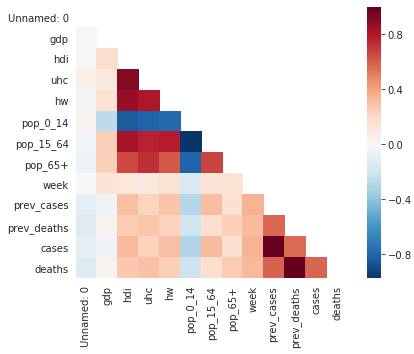

In [3]:
corr = df_final.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, center=0, cmap='RdBu_r', square=True)

# Treinamento

In [4]:
X = df_final[['gdp','hdi','uhc','hw','pop_0_14','pop_15_64','pop_65+','week','prev_cases','prev_deaths']]
X.head()

,gdp,hdi,uhc,hw,pop_0_14,pop_15_64,pop_65+,week,prev_cases,prev_deaths
0,8.273686e+10,0.496,0.37,0.3775,0.430902,0.543249,0.025849,1,0.000000,0.0
1,8.273686e+10,0.496,0.37,0.3775,0.430902,0.543249,0.025849,2,0.002629,0.0
2,8.273686e+10,0.496,0.37,0.3775,0.430902,0.543249,0.025849,3,0.010515,0.0
3,8.273686e+10,0.496,0.37,0.3775,0.430902,0.543249,0.025849,4,0.042059,0.0
4,8.273686e+10,0.496,0.37,0.3775,0.430902,0.543249,0.025849,5,0.089375,0.0


In [5]:
y = df_final[['cases','deaths']]
y.head()

,cases,deaths
0,0.002629,0.000000
1,0.010515,0.000000
2,0.042059,0.000000
3,0.089375,0.000000
4,0.299671,0.010515


In [7]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [8]:
random_state = 40
n_splits = 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
kf = KFold(n_splits)

print('train: X', X_train.shape, '- y', y_train.shape, '- KFold splits', n_splits)
print(' test: X', X_test.shape, '- y', y_test.shape)

train: X (740, 10) - y (740, 2) - KFold splits 10
 test: X (186, 10) - y (186, 2)


In [9]:
def kfold_train_validate(algoritmo, kf, X, y):
    historico = []
    
    for k, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        algoritmo.fit(X.iloc[train_idx], y.iloc[train_idx])
        r2s = algoritmo.score(X.iloc[val_idx], y.iloc[val_idx])
        historico.append([k, r2s])
    
    historico = pd.DataFrame(data=historico, columns=['k','r2 score'])
    return historico

def describe(historico):
    return pd.DataFrame(historico['r2 score']).describe().transpose()

def plot(historico):
    sns.lineplot(x='k', y='r2 score', data=historico)
    plt.show()

In [10]:
y_var = 'cases'
y_train = y_train[y_var]

In [12]:
loss='squared_loss' # 'squared_loss', 'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'
penalty='l2' # 'l2', 'l1', 'elasticnet'
alpha=0.0001
max_iter=1000
tol=1e-3

algoritmo = SGDRegressor(loss=loss, penalty=penalty, alpha=alpha, max_iter=max_iter, tol=tol)

In [13]:
historico = kfold_train_validate(algoritmo, kf, X_train, y_train)
describe(historico)

,count,mean,std,min,25%,50%,75%,max
r2 score,10.0,-3.172478e+63,8.461647e+63,-2.718002e+64,-1.262196e+63,-2.632000e+62,-5.080347e+60,-3.341153e+57


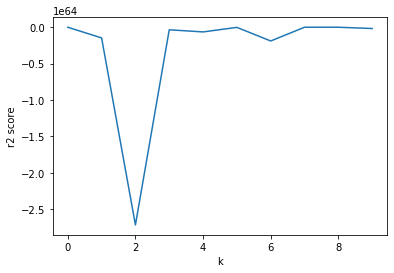

In [14]:
plot(historico)

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
algoritmo = make_pipeline(StandardScaler(), \
                          SGDRegressor(loss=loss, penalty=penalty, alpha=alpha, max_iter=max_iter, tol=tol))

In [17]:
historico = kfold_train_validate(algoritmo, kf, X_train, y_train)
describe(historico)

,count,mean,std,min,25%,50%,75%,max
r2 score,10.0,0.988819,0.00484,0.980759,0.986276,0.989709,0.991264,0.996395


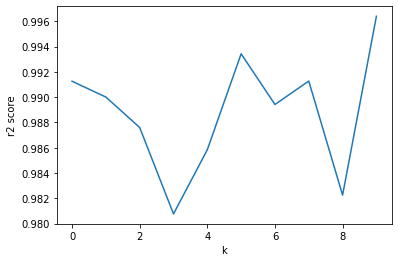

In [18]:
plot(historico)

In [43]:
loss='squared_loss' # 'squared_loss', 'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'
penalty='l2' # 'l2', 'l1', 'elasticnet'
alpha=1e-5
max_iter=100000
tol=1e-5

algoritmo = make_pipeline(StandardScaler(), \
                          SGDRegressor(loss=loss, penalty=penalty, alpha=alpha, max_iter=max_iter, tol=tol))

In [44]:
historico = kfold_train_validate(algoritmo, kf, X_train, y_train)
describe(historico)

,count,mean,std,min,25%,50%,75%,max
r2 score,10.0,0.988945,0.004896,0.980344,0.987151,0.989833,0.991581,0.996447


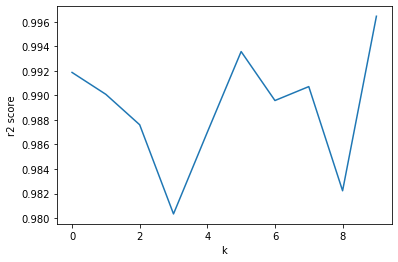

In [45]:
plot(historico)

# Teste

In [ ]:
r2s_test = algoritmo.score(X_test, y_test['cases'])
print("Test R2 score: {:3.6f}".format(r2s_test))